# Configurando o Ambiente

In [28]:
import numpy as np
import pandas as pd 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


In [2]:
path = '/kaggle/input/insurance/insurance.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


----

# Organizando o Dado

Como o dado possui alguns valores que são categoricos (sex, smoker, region), precisamos transformar esse dado em valores numéricos. Para isso foi utilizado método ```get_dummies``` do pandas. Esse método funciona como o One hot encoder, transformando cada categoria em uma coluna e preenchendo essas colunas com zeros e uns.

In [5]:
df = pd.get_dummies(df)

In [6]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


----

# Dividindo o Dataset

Para realizar a divisão do dataset em dado de treinamento e dado de validação foi utilizado o ```train_test_split``` do sklearn, essa função recebe o dado e a o tamanho do dado de teste, com isso ela separa de forma aleatória o dado de teste e o de treinamento. Para esse caso o dataset foi dividido em treinamento(75%) e validação (25%).

In [7]:
from sklearn.model_selection import train_test_split

trn_df,val_df = train_test_split(df, test_size=0.25)

Em seguida é possível utilizar o método ```.hist()``` para verificar se a distribuição nos dois conjuntos de dados estão parecidas.

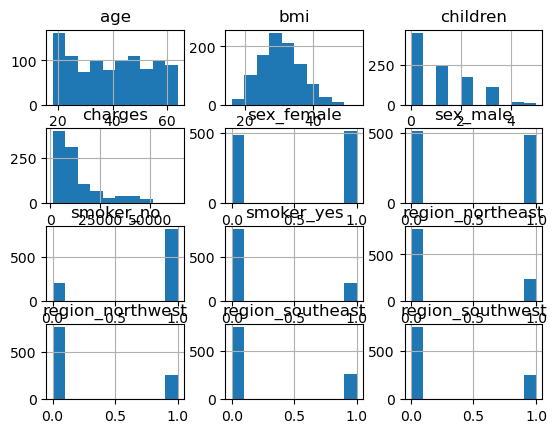

In [8]:
trn_df.hist();

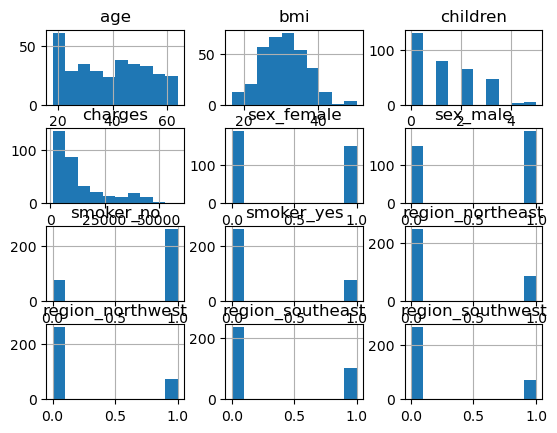

In [9]:
val_df.hist();

----

# Fazendo a Regressão

Inicialmente foi necessário separar as váriaveis independentes e dependetes do dataset.

In [10]:
trn_y = trn_df['charges']
trn_x = trn_df.drop('charges', axis = 1)
val_x = val_df.drop('charges', axis = 1)
val_y = val_df['charges']

Para o primeiro teste eu usei o modelo de regressão linear do sklearn.

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(trn_x, trn_y)

LinearRegression()

Em seguida fiz a predição com esse modelo para o dado de validação

In [12]:
y_pred = lin_reg.predict(val_x)

Depois eu calculei o erro médio absoluto

In [13]:
abs(val_y-y_pred).sum()/len(y_pred)

4046.353818170033

----

Para o segundo teste foi utilizado um modelo de **árvore de decisão**.

In [14]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

m = DecisionTreeRegressor(max_depth = 3 ).fit(trn_x, trn_y);

Com a árvore treinada é possível representar ela de forma gráfica para facilitar o entendimento.

In [15]:
#Código do curso do Jeremy howard

import graphviz
import re

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

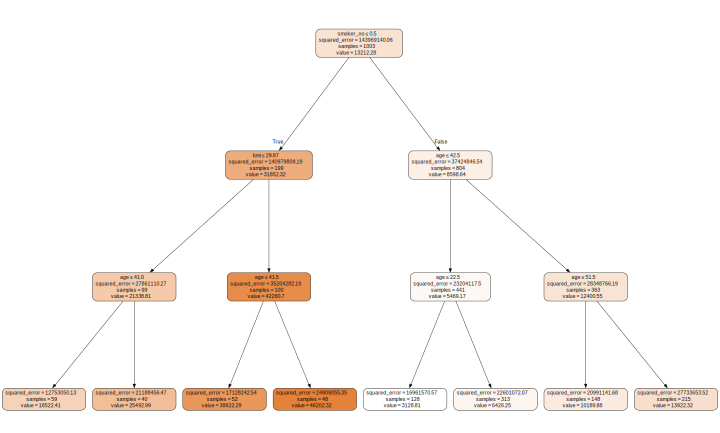

In [16]:
draw_tree(m, trn_x, size=10)

Além disso, é possível verificar a importancia de cada coluna para o modelo. Podemos perceber que a região e o sexo não tiveram nenhuma importância para esse modelo.

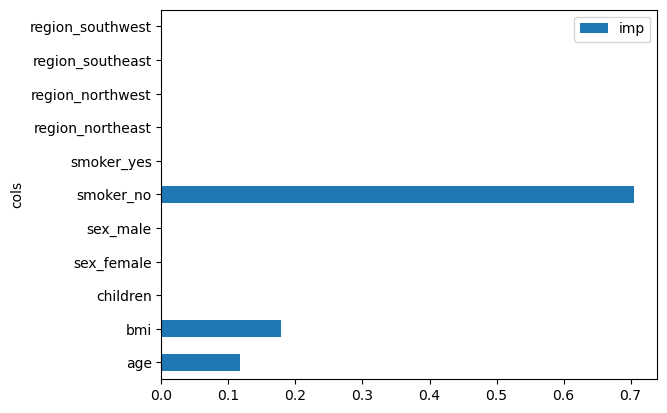

In [17]:
pd.DataFrame(dict(cols=trn_x.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');

Fazendo a predição e calculando o erro médio absoludo foi possivel verificar que teve uma melhora com relação ao modelo linear.

In [18]:
y_pred = m.predict(val_x)
abs(val_y-y_pred).sum()/len(y_pred)

2567.0850899961983

----

# Testando o PCA

Em seguida eu tentei diminuir a dimensionalidade do dado usando PCA, no entanto como o dado não possui muitas dimensões o resultado final acabou piorando. Mas ainda assim, teve um resultado melhor que o modelo linear.

In [19]:
df_x = df.drop(['charges'], axis = 1)

In [20]:
df_y = df['charges']

In [21]:
df_y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [22]:
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [23]:
principal=PCA(n_components=2)
principal.fit(df_x)
x=principal.transform(df_x)

Text(0, 0.5, 'pc2')

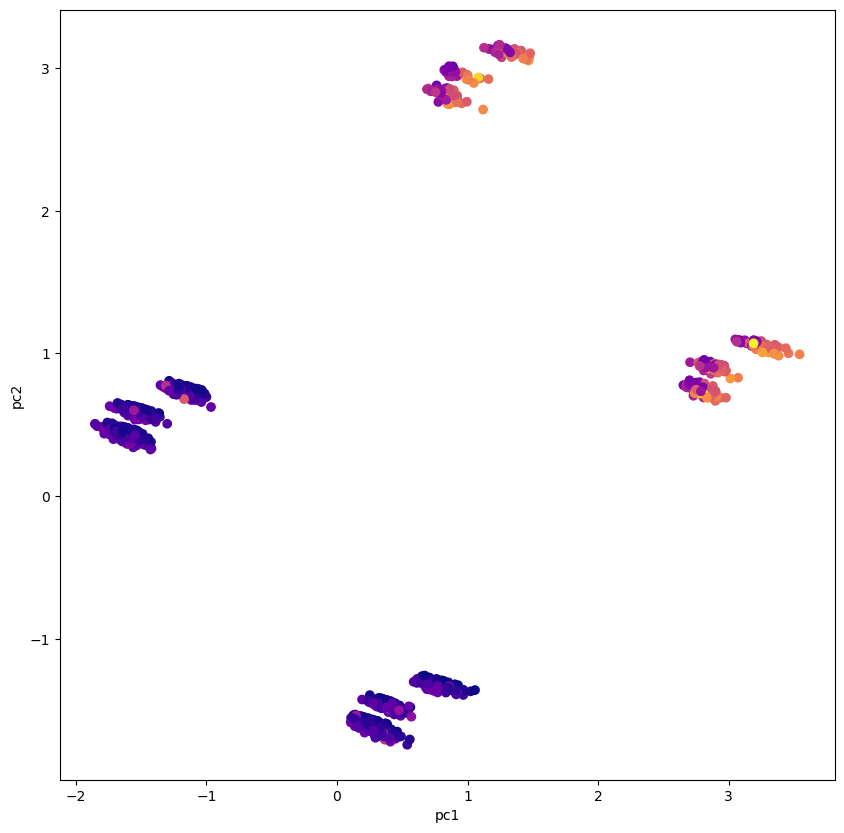

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1], c=df['charges'], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, df_y, test_size=0.25)

In [31]:
m = DecisionTreeRegressor(max_depth = 3 ).fit(x_train, y_train);

In [32]:
y_pred = m.predict(x_test)
abs(y_test-y_pred).sum()/len(y_pred)

5474.92865350316

Por fim eu verifiquei a matriz de correlação das variáveis para ver se os resultados eram semelhantes a feature importance da arvore de decisão criada anteriormente. E os resultados foram os mesmo, os dados com a maior correlação foram, smoker_yes, smoker_n, age, bmi. O resto daa caracteristicas teve uma correlação bem baixa.

In [34]:
df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
